<a href="https://colab.research.google.com/github/Sanjeevikumar-M/Internship-at-SCT/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset with the correct delimiter
dataset_path = "/content/bank-additional-full.csv"
data = pd.read_csv(dataset_path, delimiter=';')

# Verify the column names
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
print(data.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0  ...       True      False   
3          -36.4      4.857       5191.0  ...       True      False   
4          -36.4      4.857       5191.0  ...       True      False   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False         

In [ ]:
# Convert the target variable 'y' to binary (1 for 'yes', 0 for 'no')
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# Handle categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limit depth for better visualization

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7303
           1       0.60      0.59      0.60       935

    accuracy                           0.91      8238
   macro avg       0.77      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [ ]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[6935  368]
 [ 382  553]]


Text(0, 0.5, 'Accuracy')

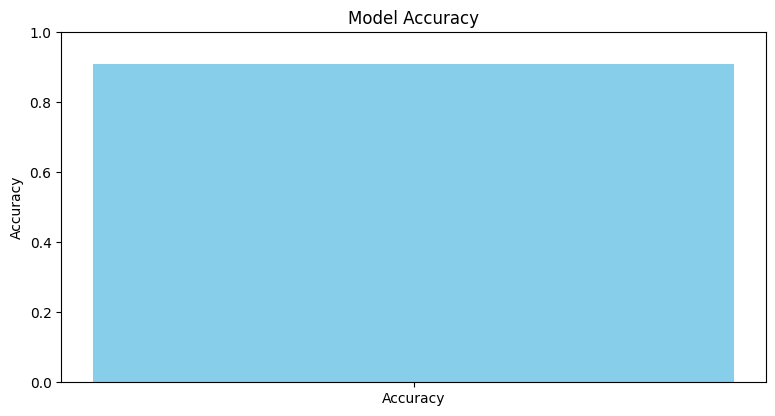

In [ ]:
# Visualizations
plt.figure(figsize=(20, 10))

# 1. Accuracy Visualization
plt.subplot(2, 2, 1)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

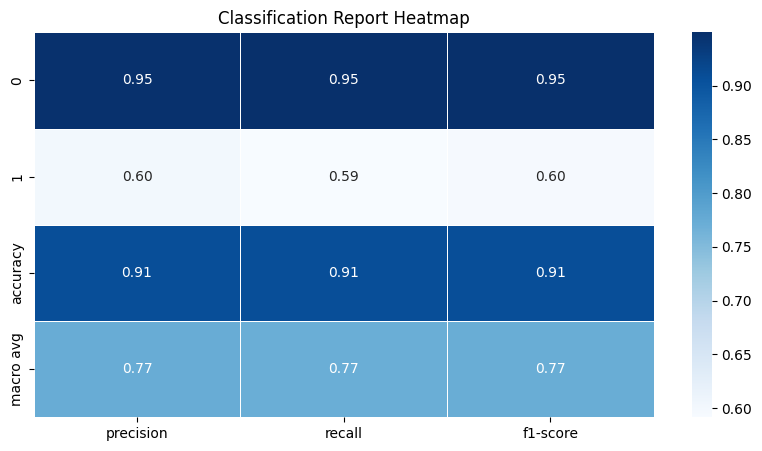

In [ ]:
# 2. Classification Report Visualization (Heatmap)
plt.figure(figsize=(10, 5))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :-1].T

sns.heatmap(report_df, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.show()

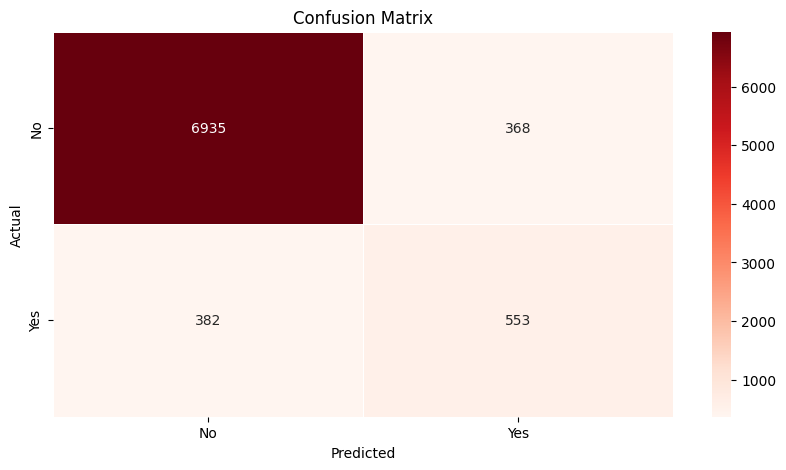

In [ ]:
# 3. Confusion Matrix Visualization (Heatmap)
plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', linewidths=0.5,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

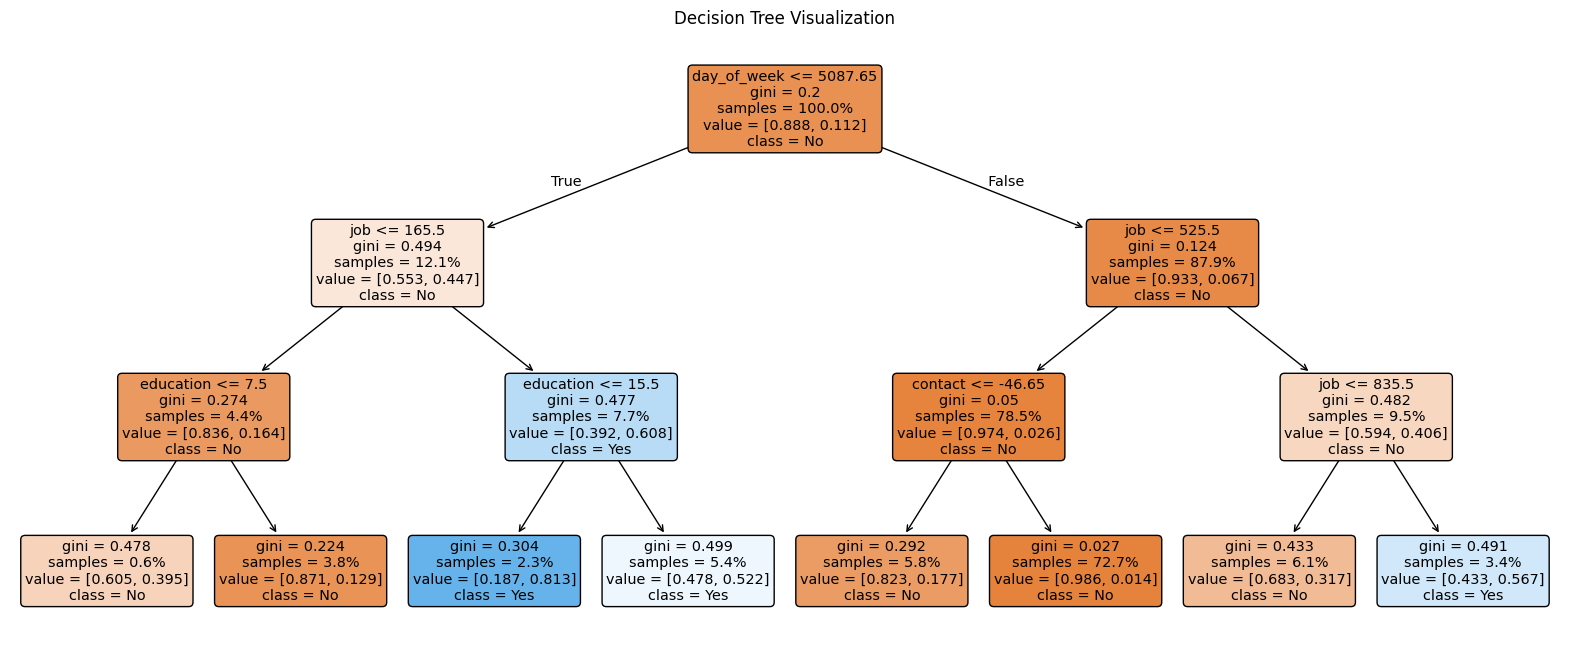

In [ ]:
# 4. Decision Tree Visualization
plt.figure(figsize=(20, 8))
plot_tree(clf, filled=True, feature_names=features, class_names=['No', 'Yes'],
          rounded=True, proportion=True)

plt.title("Decision Tree Visualization")
plt.show()

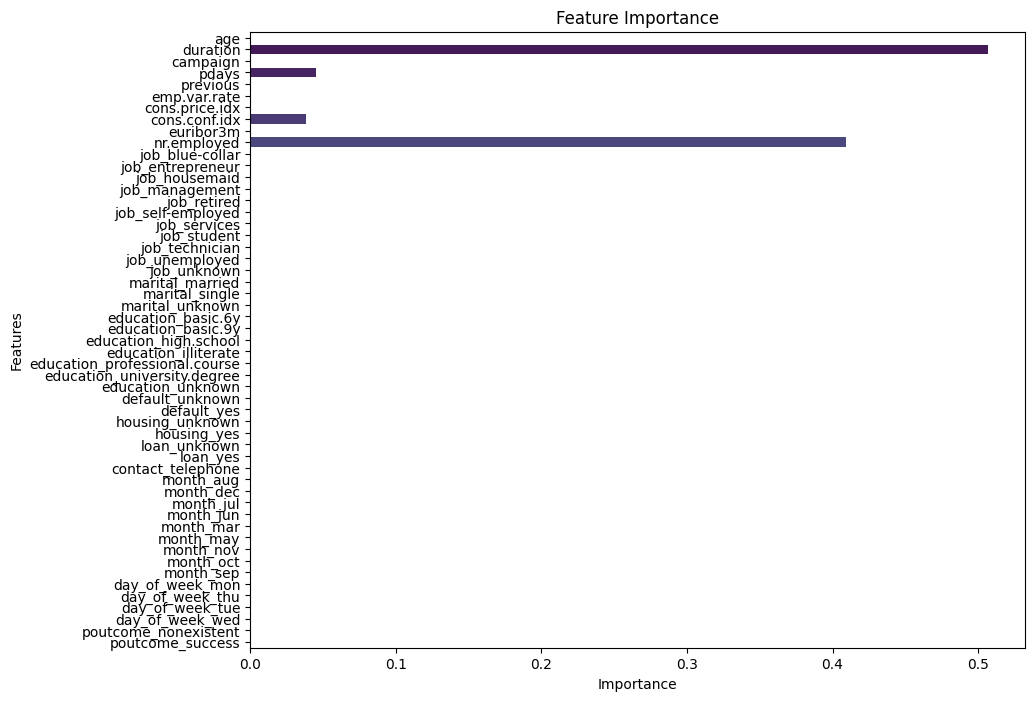

In [ ]:
# 5. Feature Importance Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=clf.feature_importances_, y=X.columns, hue=X.columns, palette='viridis', legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()